<a href="https://colab.research.google.com/github/pko89403/DeepLearningSelfStudy/blob/master/AdvancedCNN_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch.nn as nn
import torch.utils.model_zoo as model_zoo


In [0]:
def make_layer(cfg, batch_norm=False):
    layers = []
    in_channels = 3

    for v in cfg:
      if v == 'M':
        layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
      else:
        conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
        if batch_norm:
          layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
        else:
          layers += [conv2d, nn.ReLU(inplace=True)]
        in_channels = v
    return nn.Sequential(*layers)

In [0]:
cfg = {
    'A' : [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'], # 8 + 3 = vgg11
    'B' : [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'], # 10 + 3 = vgg13
    'D' : [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'], # 13 + 3 = vgg16
    'E' : [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'], # 16 + 3 = vgg19
}

In [0]:
conv = make_layer(cfg['A'])

In [5]:
conv

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace=True)
  (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace=True)
  (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (16): Conv2d(512, 512, kernel_size=(3, 3), stride=

In [0]:
class VGG(nn.Module):
  def __init__(self, features, num_classes=1000, init_weights=True):
    super(VGG, self).__init__()
    self.features = features # convolution
    self.avgpool = nn.AdaptiveAvgPool2d((7,7))

    self.classifier = nn.Sequential(
        nn.Linear(512 * 7 * 7, 4096),
        nn.ReLU(True),
        nn.Dropout(),
        nn.Linear(4096,4096),
        nn.ReLU(True),
        nn.Dropout(), 
        nn.Linear(4096, num_classes),
    )

    if init_weights:
      self._initialize_weights()

  def forward(self, x):
    x = self.features(x) # Convolution
    x = self.avgpool(x) # AvgPool
    x = x.view(x.size(0), -1)
    x = self.classifier(x) # Fully-Connected
    return x

  def _initialize_weights(self):
    for m in self.modules():
      if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        if m.bias is not None:
          nn.init.constant_(m.bias, 0)
      elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)
      elif isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, 0, 0.01)
        nn.init.constant_(m.bias, 0)

In [0]:
CNN = VGG(make_layer(cfg['A']), num_classes=10, init_weights=True)

In [0]:
import torch 

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [9]:
import torchvision
from torchvision import transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=512, shuffle=True, num_workers=4)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True, num_workers=4)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


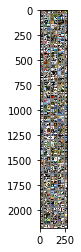

In [10]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

def imshow(img):
  img = img /2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

In [0]:
 import torchvision.models.vgg as vgg

In [0]:
cfg_cifar10 = [32, 32, 'M', 64, 64, 128, 128, 128, 'M', 256, 256, 256, 512, 512, 512, 'M']
# 32 -> M -> 16 -> M -> 8 -> M -> 4

In [0]:
# 미앙 ~ 귀찮아서 복붙해써어~
class VGG(nn.Module):
  def __init__(self, features, num_classes=1000, init_weights=True):
    super(VGG, self).__init__()
    self.features = features # convolution
    # self.avgpool = nn.AdaptiveAvgPool2d((7,7))
    self.classifier = nn.Sequential(
        nn.Linear(512 * 4 * 4, 4096),
        nn.ReLU(True),
        nn.Dropout(),
        nn.Linear(4096,4096),
        nn.ReLU(True),
        nn.Dropout(), 
        nn.Linear(4096, num_classes),
    )

    if init_weights:
      self._initialize_weights()

  def forward(self, x):
    x = self.features(x) # Convolution
    #x = self.avgpool(x) # AvgPool
    x = x.view(x.size(0), -1)
    x = self.classifier(x) # Fully-Connected
    return x

  def _initialize_weights(self):
    for m in self.modules():
      if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        if m.bias is not None:
          nn.init.constant_(m.bias, 0)
      elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)
      elif isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, 0, 0.01)
        nn.init.constant_(m.bias, 0)

In [0]:
vgg16 = VGG(vgg.make_layers(cfg_cifar10), 10, True).to(device)

In [22]:
a = torch.Tensor(1, 3, 32, 32).to(device)
out = vgg16(a)
print(out)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0',
       grad_fn=<AddmmBackward>)


In [0]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(vgg16.parameters(), lr=0.005, momentum=0.9)
lr_sche  = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)

In [25]:
epochs = 5
for epoch in range(epochs):
  running_loss = 0.0
  lr_sche.step()

  for i , data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    outputs = vgg16(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 30 == 29:
      print('[%d %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 30))
      running_loss=0.0
      

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


[1    30] loss: 2.302
[1    60] loss: 2.299
[1    90] loss: 2.294
[2    30] loss: 2.276
[2    60] loss: 2.215
[2    90] loss: 2.071
[3    30] loss: 1.912
[3    60] loss: 1.823
[3    90] loss: 1.710
[4    30] loss: 1.714
[4    60] loss: 1.674
[4    90] loss: 1.622
[5    30] loss: 1.544
[5    60] loss: 1.522
[5    90] loss: 1.502


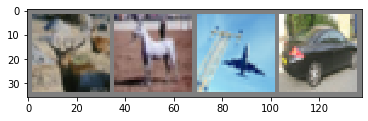

Ground Truth :   deer horse plane   car


In [28]:
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('Ground Truth : ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = vgg16(images.to(device))

In [31]:
_m, predicted = torch.max(outputs, 1)

print('Predicted : ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted :   frog horse plane   car


In [32]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    outputs = vgg16(images)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)

    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % ( 100 * correct / total))

Accuracy of the network on the 10000 test images: 46 %
